# Fitting data

The field of extracting information from data is often these days called *machine learning*. That is, the process by which computers can learn information about your data.

There are two main classes of machine learning:

1. **Supervised** This is where you learn about the relationship between some measurement of the data and some label of the data. Once the relationship is established, you can then use it to predict what label to apply to new measurements. Supervised learning falls into two categories: *classification* where the labels are discrete and *regression* where the labels are continuous.

2. **Unsupervised** This is where you don't have any label associated with the data and the algorithm will need to extract features of interest itself. Examples of this are *clustering* and *dimensionality reduction*.

We'll start by looking into regression analysis. This is often the earliest tool that people have come across and at its simplest is just fitting a straight line to some data points.

## Linear regression

First we shall create some data points. We'll use numpy's random number generator to create the data. `np.random.RandomState(1)` is used to fix the random number generator to get reproducible results. Feel free to change the number `42` for your code to something else or remove it entirely to get different data each time you run it.

The variable `x` and `y` then hold the coordinates of the data, created from a gradient of $2.0$ and a y-intercept of $-5.0$.

In [1]:
import numpy as np

rng = np.random.RandomState(42)

number_of_points = 50
x_scale = 10
gradient = 2
y_intercept = -5

x = x_scale * rng.rand(number_of_points)
y = gradient * x + y_intercept + rng.normal(size=number_of_points)

Let's look at the data by putting it into a pandas `DataFrame` and creating a scatter plot.

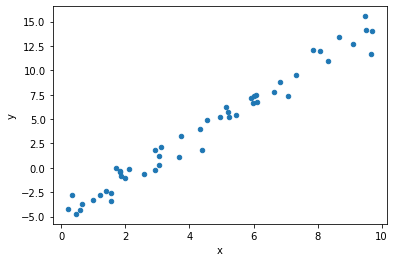

In [2]:
%matplotlib inline

from pandas import DataFrame

data = DataFrame({"x": x, "y": y})
data.plot.scatter("x", "y")

We can clearly visually see here the relationship between the $x$ and $y$ values but we need to be able to extract them programmatically.

For this and for the other machine learning techniques in this course, we will be using [scikit-learn](http://scikit-learn.org/). It provides a whole host of tools for studying data. You may also want to investigate [statsmodels](https://www.statsmodels.org) which also provides a large number of tools for statistical exploration.

scikit-learn provides a number of models which you can use to study your data. Each model is a Python class which can be imported and used. Linear regression is available as `sklearn.linear_model.LinearRegression`. We import the model and set it up with any hyperparameters we want. Hyperparameters are variables or options in a model which you set up-front rather than letting them be learned from the data. In our case, the hyperparameter we set is that the y-intercept of the model should be allowed to vary.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

Once we have created our model, we can fit it to the data by calling the `fit()` method on it. This takes two arguments:

1. The input data in the shape `[n_samples, n_features]`.
2. The labels of the data in the shape `[n_samples]`

In our case we only have one feature, $x$, and 50 data points so it should be in the shape `[50, 1]`. If we just request `data["x"]` then that will be a 1D array (actually a pandas `Series`) of shape `[50]` so we must request the data with `data[["x"]]` (which returns it as a single-column `DataFrame`).

If you're using pandas to store your data (as we are) then just remember that the first argument should be a `DataFrame` and the second should be a `Series`.

In [4]:
model.fit(data[["x"]], data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Once we've performed the fit, we can use it to predict the value of new data points which weren't part of the original data set.

We can use this to plot the fit it over the original data to compare the result. By generating a set of evenly-spaced $x$ values (`xfit`) and then getting the corresponding $y$-values (`yfit`) we can plot a straight line of the model.

The `predict()` function takes an array of the same shape as the original input data (`[n_samples, n_features]`) so we use `xfit[:, np.newaxis]` to turn `xfit` from `[50]` to `[50, 1]`. For a more detailed explanation of `np.newaxis`, see [this aside](aside_newaxis.ipynb).

We then plot the original data in the same way as before and place the line in the same plot.

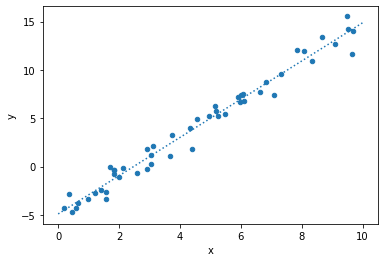

In [5]:
xfit = np.linspace(0, x_scale)
yfit = model.predict(xfit[:, np.newaxis])

ax = data.plot.scatter("x", "y")
ax.plot(xfit, yfit, linestyle=":")

As well as plotting the line in a graph, we can also extract the calculated values of the gradient and y-intercept. The gradient is available as a list of values, `model.coef_`, one for each dimension or feature. The intercept is available as  `model.intercept_`:

In [6]:
print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

 Model gradient:  1.9776566003853107
Model intercept: -4.903310725531115


### Exercise

- Run this run this code again with different gradients and y-intercepts, make sure that the model reproduces the input values.
- See how the precision of the match varies as you change the number of points. [<small>answer</small>](answer_regression_point_vary.ipynb)

## The supervised learning process

There is a standard process that you go through with most supervised learning problems which is worth understanding. They all start with the initial data collection. You go out into "the wild" and collect some data, $x$, this could be people's heights or lengths of leaves of trees or anything in your field which you consider easy to collect/measure. Alongside that you, as an expert, label each data point you collected with some extra data (that could be people's age or species of tree or anything which would be considered difficult to collect/measure) and we call that $y$.

Using $x$ and $y$ we train (or "fit") a model to predict the relationship between those two. If we pass our $x$ into that model after it has been trained, we receive a prediction which we call $\hat{y}$ (y-hat). So where $y$ can be thought of as being defined as:

$$y = \operatorname{reality}(x)$$

$\hat{y}$ can be though of as being defined as:

$$\hat{y} = \operatorname{model}(x)$$

We want $\hat{y}$ to be very similar to $y$ so it's common to define the goodness of your model based on the residual, $y - \hat{y}$.

We can then pass new, real world, unlabelled data $x'$ into our model and retrieve a prediction $ŷ'$ which we believe reflects reality.

## Non-linear regression

Since we're fitting a straight line, it may seem impossible for this technique to be able to correctly fit more complicated relationships. In general that is true but scikit-learn provides preprocessing tools which can automatically transform your data into something which can be understood linearly.

Let's start by making some definitely non-linear data from a sine curve:

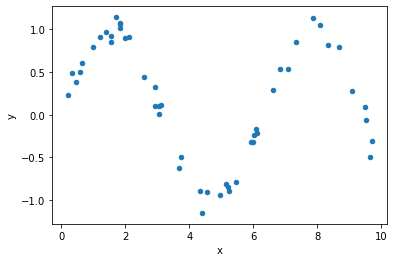

In [7]:
rng = np.random.RandomState(42)

number_of_points = 50
x_scale = 10

x = x_scale * rng.rand(number_of_points)
y = np.sin(x) + 0.1 * rng.normal(size=number_of_points)

sin_data = DataFrame({"x": x, "y": y})
sin_data.plot.scatter("x", "y")

Of course a linear fit will not work for this data (actually not true, a linear fit will give an answer for this data without trouble, it's just that the fit will be useless) so let's allow the data to be transformed by a polynomial basis-function before the linear regression. We put these together into a pipeline using scikit-learns's `make_pipeline()` function. This output of this function can be used in the same way as the standard `LinearRegression` model.

Let's make a pipeline which first applies a 7<sup>th</sup>-order polynomial and then fits it with a linear regression:

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

This `poly_model` can then be used like the plain `LinearRegression` model before and have the `fit()` method called on it.

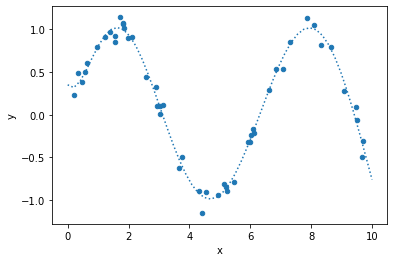

In [9]:
poly_model.fit(sin_data[["x"]], sin_data["y"])

xfit = np.linspace(0, x_scale)
yfit = poly_model.predict(xfit[:, np.newaxis])

ax = sin_data.plot.scatter("x", "y")
ax.plot(xfit, yfit, linestyle=":")

You can think of the combined "transform and linear fit" as being a single fit with a 7<sup>th</sup>-order polynomial.

### Exercise

- Change the order of the polynomial. When does the data start to fit well. What happens when you make the polynomial order very large?

### Exercise

- Load the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) from the scikit-learn collection. Fit and plot the linear relationship between the "bmi" column (Body mass index) and the "target" column (quantitative measure of disease progression one year after baseline). You can load the dataset into pandas with:
  ```python
  from pandas import DataFrame
  from sklearn.datasets import load_diabetes
  
  diabetes = DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
  diabetes["target"] = load_diabetes().target
  ```
  
  [<small>answer</small>](answer_diabetes_regression.ipynb)

Next we will look into how we can visualise the correlations between large sets of variables.